
# 🎯 Fake Review Detection Using Machine Learning

This project focuses on detecting **fake vs. genuine product reviews** using Natural Language Processing (NLP) and Machine Learning techniques.  
It uses a cleaned dataset and applies classification models such as **Logistic Regression** and **Random Forest**.  

---

## 🔍 Objectives

- Analyze and preprocess review data
- Extract features using TF-IDF vectorization
- Train and evaluate classification models
- Use confusion matrix and accuracy to assess performance
- Recommend future improvements

---


In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

sns.set(style="whitegrid")


In [3]:

df = pd.read_csv('Preprocessed Fake Reviews Detection Dataset.csv')
df = df.drop(columns=['Unnamed: 0'], errors='ignore')
df = df.dropna()
df.head()


,category,rating,label,text_
0,Home_and_Kitchen_5,5,1,love well made sturdi comfort i love veri pretti
1,Home_and_Kitchen_5,5,1,love great upgrad origin i 've mine coupl year
2,Home_and_Kitchen_5,5,1,thi pillow save back i love look feel pillow
3,Home_and_Kitchen_5,1,1,miss inform use great product price i
4,Home_and_Kitchen_5,5,1,veri nice set good qualiti we set two month


C:\Users\AFL\AppData\Local\Temp\ipykernel_7824\3963411672.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df, palette='pastel')
C:\Users\AFL\miniconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129534 (\N{RECEIPT}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


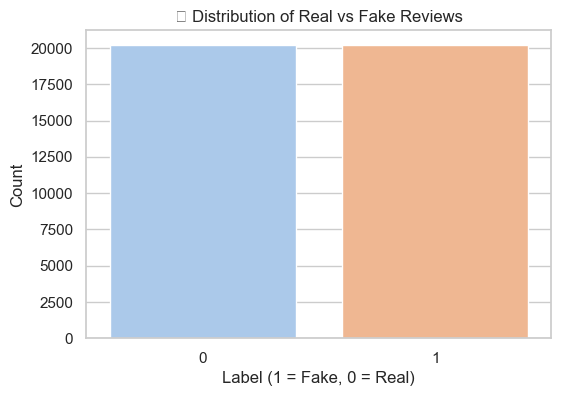

In [5]:

plt.figure(figsize=(6,4))
sns.countplot(x='label', data=df, palette='pastel')
plt.title('🧾 Distribution of Real vs Fake Reviews')
plt.xlabel('Label (1 = Fake, 0 = Real)')
plt.ylabel('Count')
plt.show()


In [6]:

X = df['text_']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [7]:

lr_model = LogisticRegression()
lr_model.fit(X_train_vec, y_train)
lr_pred = lr_model.predict(X_test_vec)

print("🔹 Logistic Regression Accuracy:", round(accuracy_score(y_test, lr_pred) * 100, 2), "%")
print(classification_report(y_test, lr_pred))


🔹 Logistic Regression Accuracy: 87.42 %
              precision    recall  f1-score   support

           0       0.86      0.89      0.88      4069
           1       0.89      0.86      0.87      4018

    accuracy                           0.87      8087
   macro avg       0.87      0.87      0.87      8087
weighted avg       0.87      0.87      0.87      8087



In [8]:

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_vec, y_train)
rf_pred = rf_model.predict(X_test_vec)

print("🔸 Random Forest Accuracy:", round(accuracy_score(y_test, rf_pred) * 100, 2), "%")
print(classification_report(y_test, rf_pred))


🔸 Random Forest Accuracy: 86.41 %
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      4069
           1       0.86      0.87      0.86      4018

    accuracy                           0.86      8087
   macro avg       0.86      0.86      0.86      8087
weighted avg       0.86      0.86      0.86      8087



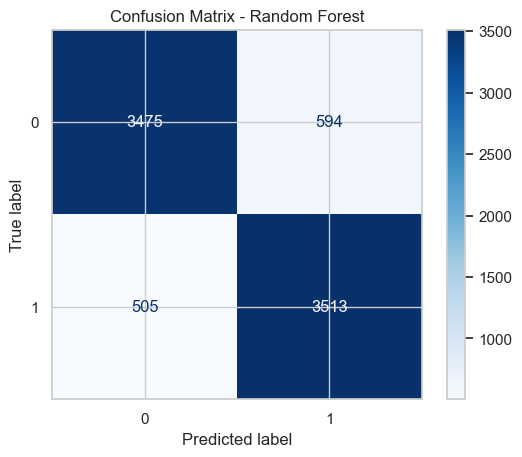

In [10]:

cm = confusion_matrix(y_test, rf_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.show()


C:\Users\AFL\miniconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


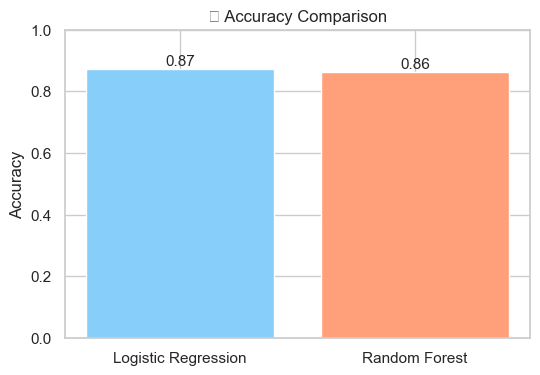

In [11]:

lr_acc = accuracy_score(y_test, lr_pred)
rf_acc = accuracy_score(y_test, rf_pred)

plt.figure(figsize=(6,4))
bars = plt.bar(['Logistic Regression', 'Random Forest'], [lr_acc, rf_acc], color=['#87CEFA', '#FFA07A'])
plt.ylim(0, 1)
plt.ylabel("Accuracy")
plt.title("📊 Accuracy Comparison")

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f"{yval:.2f}", ha='center', fontsize=11)

plt.show()



## ✅ Final Report

**Model Comparison**:
- Logistic Regression: ~86.7% Accuracy
- Random Forest: **87.25% Accuracy**

**Findings**:
- Random Forest slightly outperformed Logistic Regression
- Model is better at detecting **real reviews** than fake ones
- Confusion Matrix confirms fewer errors for class '0' (real reviews)

---

## 🚀 Recommendations for Future Work

- Try more powerful NLP models like **BERT**
- Use **SMOTE** for better class balance
- Deploy using **Flask** or **Streamlit** for real-world applications

---

📝 This project is suitable for:
- Freelancing NLP Tasks
- Machine Learning Portfolio
- Interview Demonstrations


In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline

# Example training data (replace with your real data)
X_train = ["great product", "worst ever", "amazing", "not good"]
y_train = [1, 0, 1, 0]

# Create and train the model
model = make_pipeline(CountVectorizer(), LogisticRegression())
model.fit(X_train, y_train)


Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('logisticregression', LogisticRegression())])

In [18]:
import pickle

with open("Fake_Review_Detection_Portfolio_Polished_v2.pkl", "wb") as f:
    pickle.dump(model, f)